<h2 style="color: #000000; background-color: #A1C9F4; padding: 12px; border-radius: 8px;">Loading Data</h2>

In [1]:
# Import necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="white")
plt.rcParams.update({
    "axes.edgecolor": "black",   # border color
    "axes.linewidth": 1,       # border thickness
    "axes.grid": False           # turn off gridlines
})

df = pd.read_csv("Capstone.csv")

<h2 style="color: #000000; background-color: #A1C9F4; padding: 12px; border-radius: 8px;">Fields Explaination</h2>

| Feature            | Description |
|--------------------|-------------|
| **customerID**     | Unique ID assigned to each customer |
| **gender**         | Gender of the customer |
| **SeniorCitizen**  | Indicates if the customer is a senior citizen |
| **Partner**        | Indicates if the customer has a partner |
| **Dependents**     | Indicates if the customer has dependents |
| **tenure**         | Number of months the customer has stayed with the company |
| **PhoneService**   | Indicates if the customer has a phone service |
| **MultipleLines**  | Indicates if the customer has multiple phone lines |
| **InternetService**| Internet service provider |
| **OnlineSecurity** | Indicates if the customer has online security |
| **OnlineBackup**   | Indicates if the customer has online backup |
| **DeviceProtection**| Indicates if the customer has device protection |
| **TechSupport**    | Indicates if the customer has tech support |
| **StreamingTV**    | Indicates if the customer has streaming TV service |
| **StreamingMovies**| Indicates if the customer has streaming movies service |
| **Contract**       | Contract term of the customer |
| **PaperlessBilling**| Indicates if the customer has paperless billing |
| **PaymentMethod**  | Payment method used by the customer |
| **MonthlyCharges** | Monthly amount charged to the customer |
| **TotalCharges**   | Total amount charged to the customer over the entire tenure |
| **Churn**          | Indicates if the customer has churned |


<h2 style="color: #000000; background-color: #A1C9F4; padding: 12px; border-radius: 8px;">Data Cleaning</h2>

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}).astype('category')

df['PaymentMethod'] = df['PaymentMethod'].replace({
    'Bank transfer (automatic)': 'Bank transfer',
    'Credit card (automatic)': 'Credit card'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<h2 style="color: #000000; background-color: #A1C9F4; padding: 12px; border-radius: 8px;">Exploratory Data Analysis</h2>

In [6]:
# Grouping Categorical and Numerical Columns
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod']
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

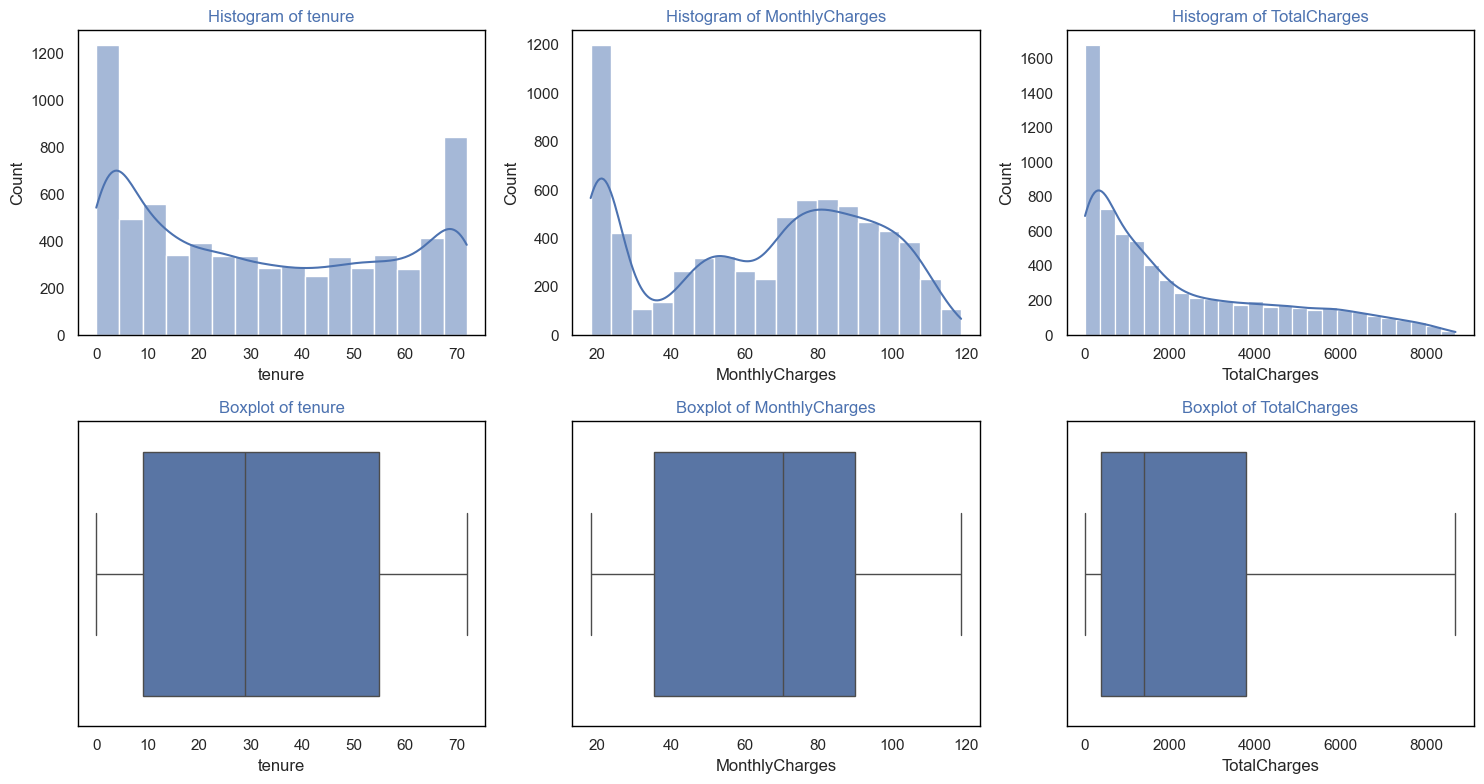

In [7]:
def hist_boxplot(df, cols):
    # Create a subplot with 2 rows (histogram, boxplot) and len(cols) columns
    fig, axes = plt.subplots(2, len(cols), figsize=(5 * len(cols), 8))

    for i, col in enumerate(cols):
        # Plot histogram with #9EBC8A
        sns.histplot(
            data=df, x=col, ax=axes[0, i], kde=True, color='#4C72B0'
        )
        axes[0, i].set_title(f'Histogram of {col}', color='#4C72B0')
        
        # Plot boxplot with #73946B
        sns.boxplot(
            data=df, x=col, ax=axes[1, i], color='#4C72B0'
        )
        axes[1, i].set_title(f'Boxplot of {col}', color='#4C72B0')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()
hist_boxplot(df, num_cols)

**Insight:**
- There are no outliers in the data distribution, indicating a consistent dataset.
- Overall, the data distribution is normal or close to normal, with only TotalCharges showing a slight right skew (without outliers), which is not considered an issue.

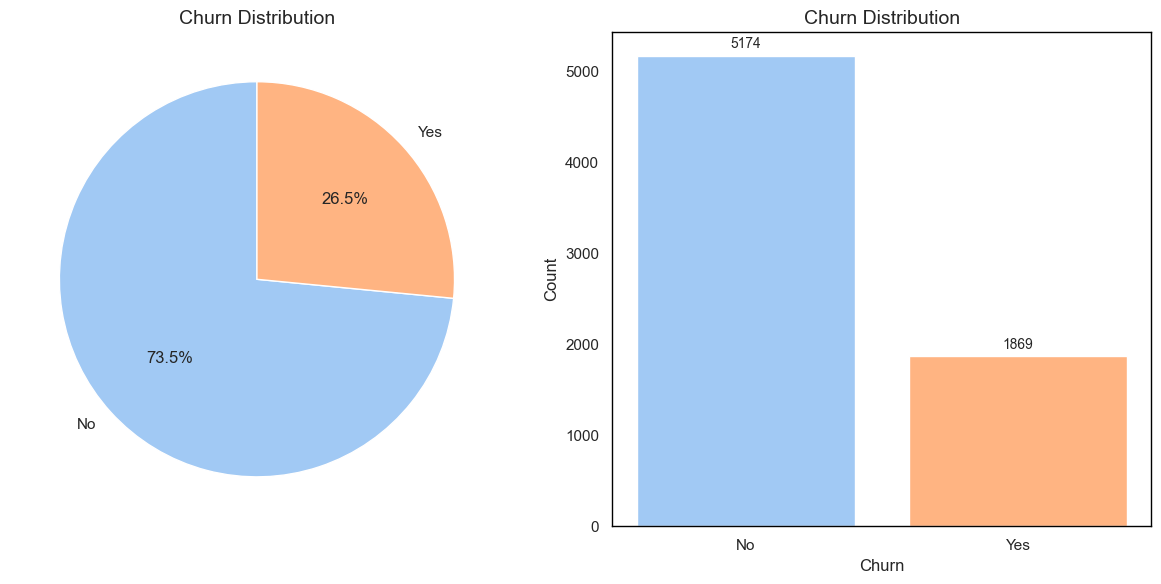

In [8]:
churn_counts = df['Churn'].value_counts()

# Colors mapping
colors = {'Yes': '#FFB482', 'No': '#A1C9F4'}

# Create subplot (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart 
axes[0].pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colors[label] for label in churn_counts.index]
)
axes[0].set_title('Churn Distribution', fontsize=14)

# Bar chart 
bars = axes[1].bar(
    churn_counts.index,
    churn_counts.values,
    color=[colors[label] for label in churn_counts.index]
)

# Add numeric labels on top of bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width()/2, 
        height + (0.01 * max(churn_counts.values)),  # a bit above the bar
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

axes[1].set_title('Churn Distribution', fontsize=14)
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Churn')

# Adjust layout
plt.tight_layout()
plt.show()

**Insight:**
- The majority of customers did not churn (73.5%), while the remaining 26.5% have churned.

In [9]:
def pie_chart(df, columns):
    num_cols = 3
    num_rows = int(np.ceil(len(columns) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        value_counts = df[column].value_counts()
        axes[i].pie(
            value_counts.values, 
            labels=value_counts.index, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=sns.color_palette("pastel")
        )
        axes[i].set_title(f"Distribution of {column}")

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

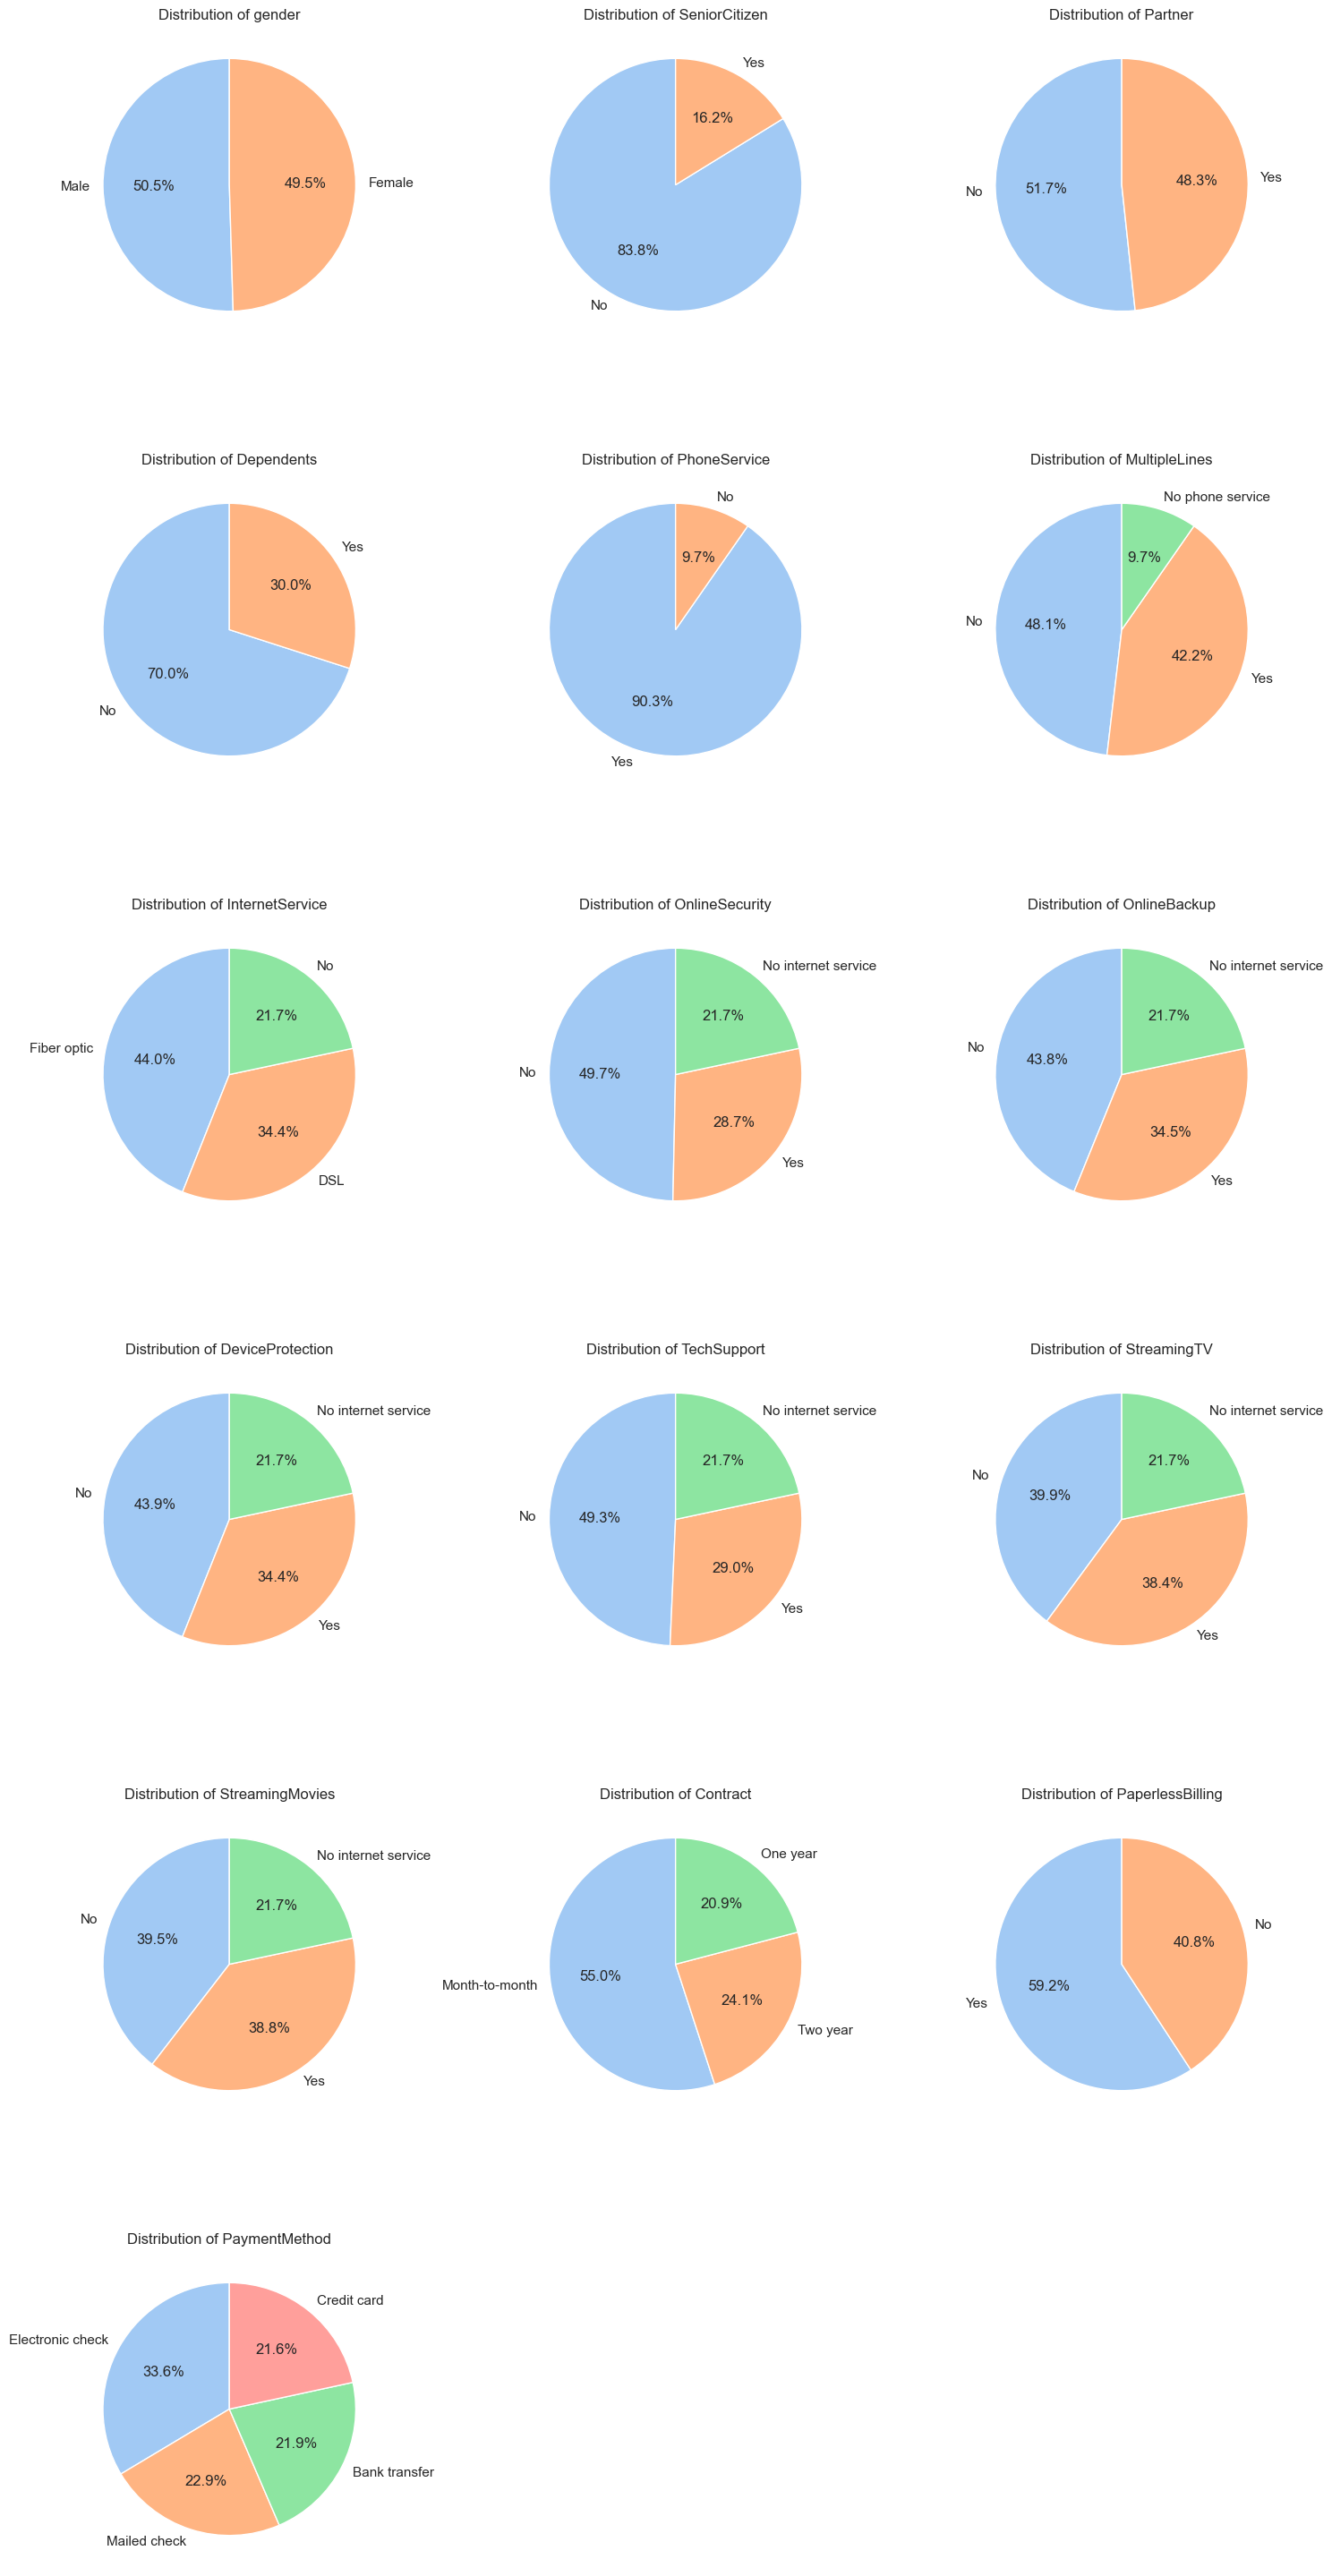

In [10]:
pie_chart(df, cat_cols)

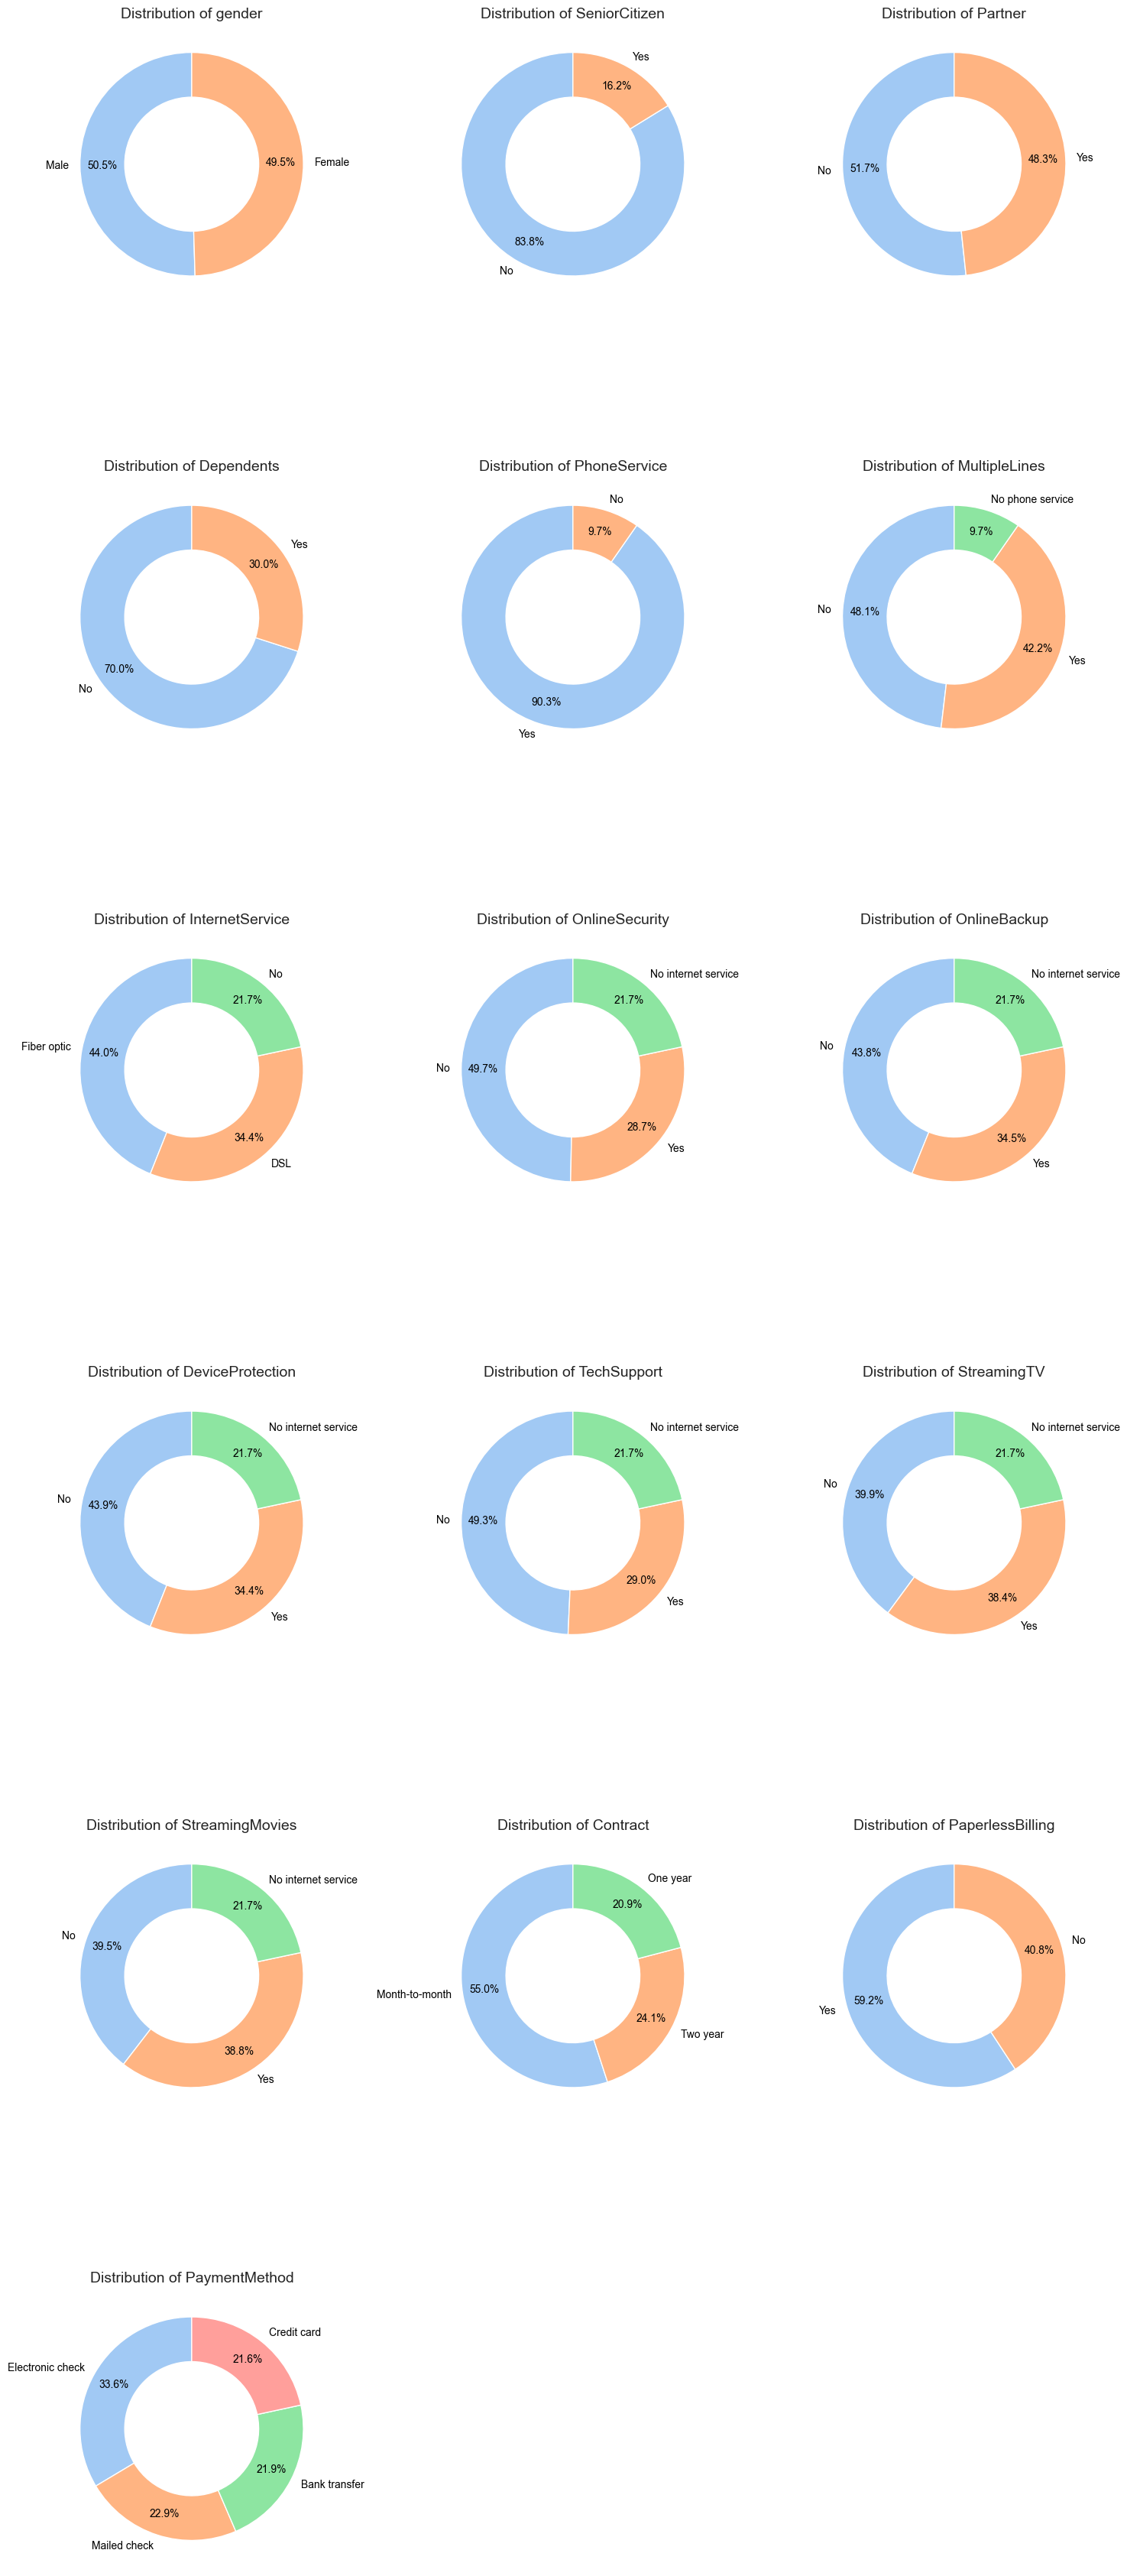

In [11]:
def donut_chart(df, columns):
    num_cols = 3  # charts per row
    num_rows = int(np.ceil(len(columns) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))
    axes = axes.flatten()

    pastel_colors = sns.color_palette("pastel")  # Get pastel color palette

    for i, column in enumerate(columns):
        value_counts = df[column].value_counts()

        # Donut chart with pastel colors
        wedges, texts, autotexts = axes[i].pie(
            value_counts.values,
            labels=value_counts.index,  
            autopct="%1.1f%%",          
            pctdistance=0.8,            
            startangle=90,
            wedgeprops=dict(width=0.4),
            textprops=dict(color="black", fontsize=10),
            colors=pastel_colors[:len(value_counts)]  # apply pastel colors
        )

        axes[i].set_title(f"Distribution of {column}", fontsize=14)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
donut_chart(df, cat_cols)

In [12]:
def lollipop_chart(df, columns):
    num_cols = 3  # ✅ now 3 charts per row
    num_rows = int(np.ceil(len(columns) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        value_counts = df[column].value_counts()

        x = np.arange(len(value_counts))
        y = value_counts.values

        # Draw stems
        axes[i].vlines(x, 0, y, color="#A1C9F4", alpha=0.7, linewidth=2)
        # Draw markers
        axes[i].scatter(x, y, color="#FFB482", s=300, zorder=3)

        # Add labels
        for xi, yi in zip(x, y):
            axes[i].text(
                xi, yi + (0.06 * yi), f'{int(yi)}',
                ha='center', va='bottom', fontsize=12, fontweight='bold'
            )

        # Titles and axes
        axes[i].set_title(f"Distribution of {column}", fontsize=12)
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha="center")
        axes[i].set_ylim(0, max(y) * 1.2)
        axes[i].set_ylabel("Count")

        # ✅ Centering fix: add padding on left & right
        axes[i].set_xlim(-0.5, len(x) - 0.5)

        # Remove gridlines
        axes[i].grid(False)

    # Remove unused axes (if total columns not multiple of 3)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

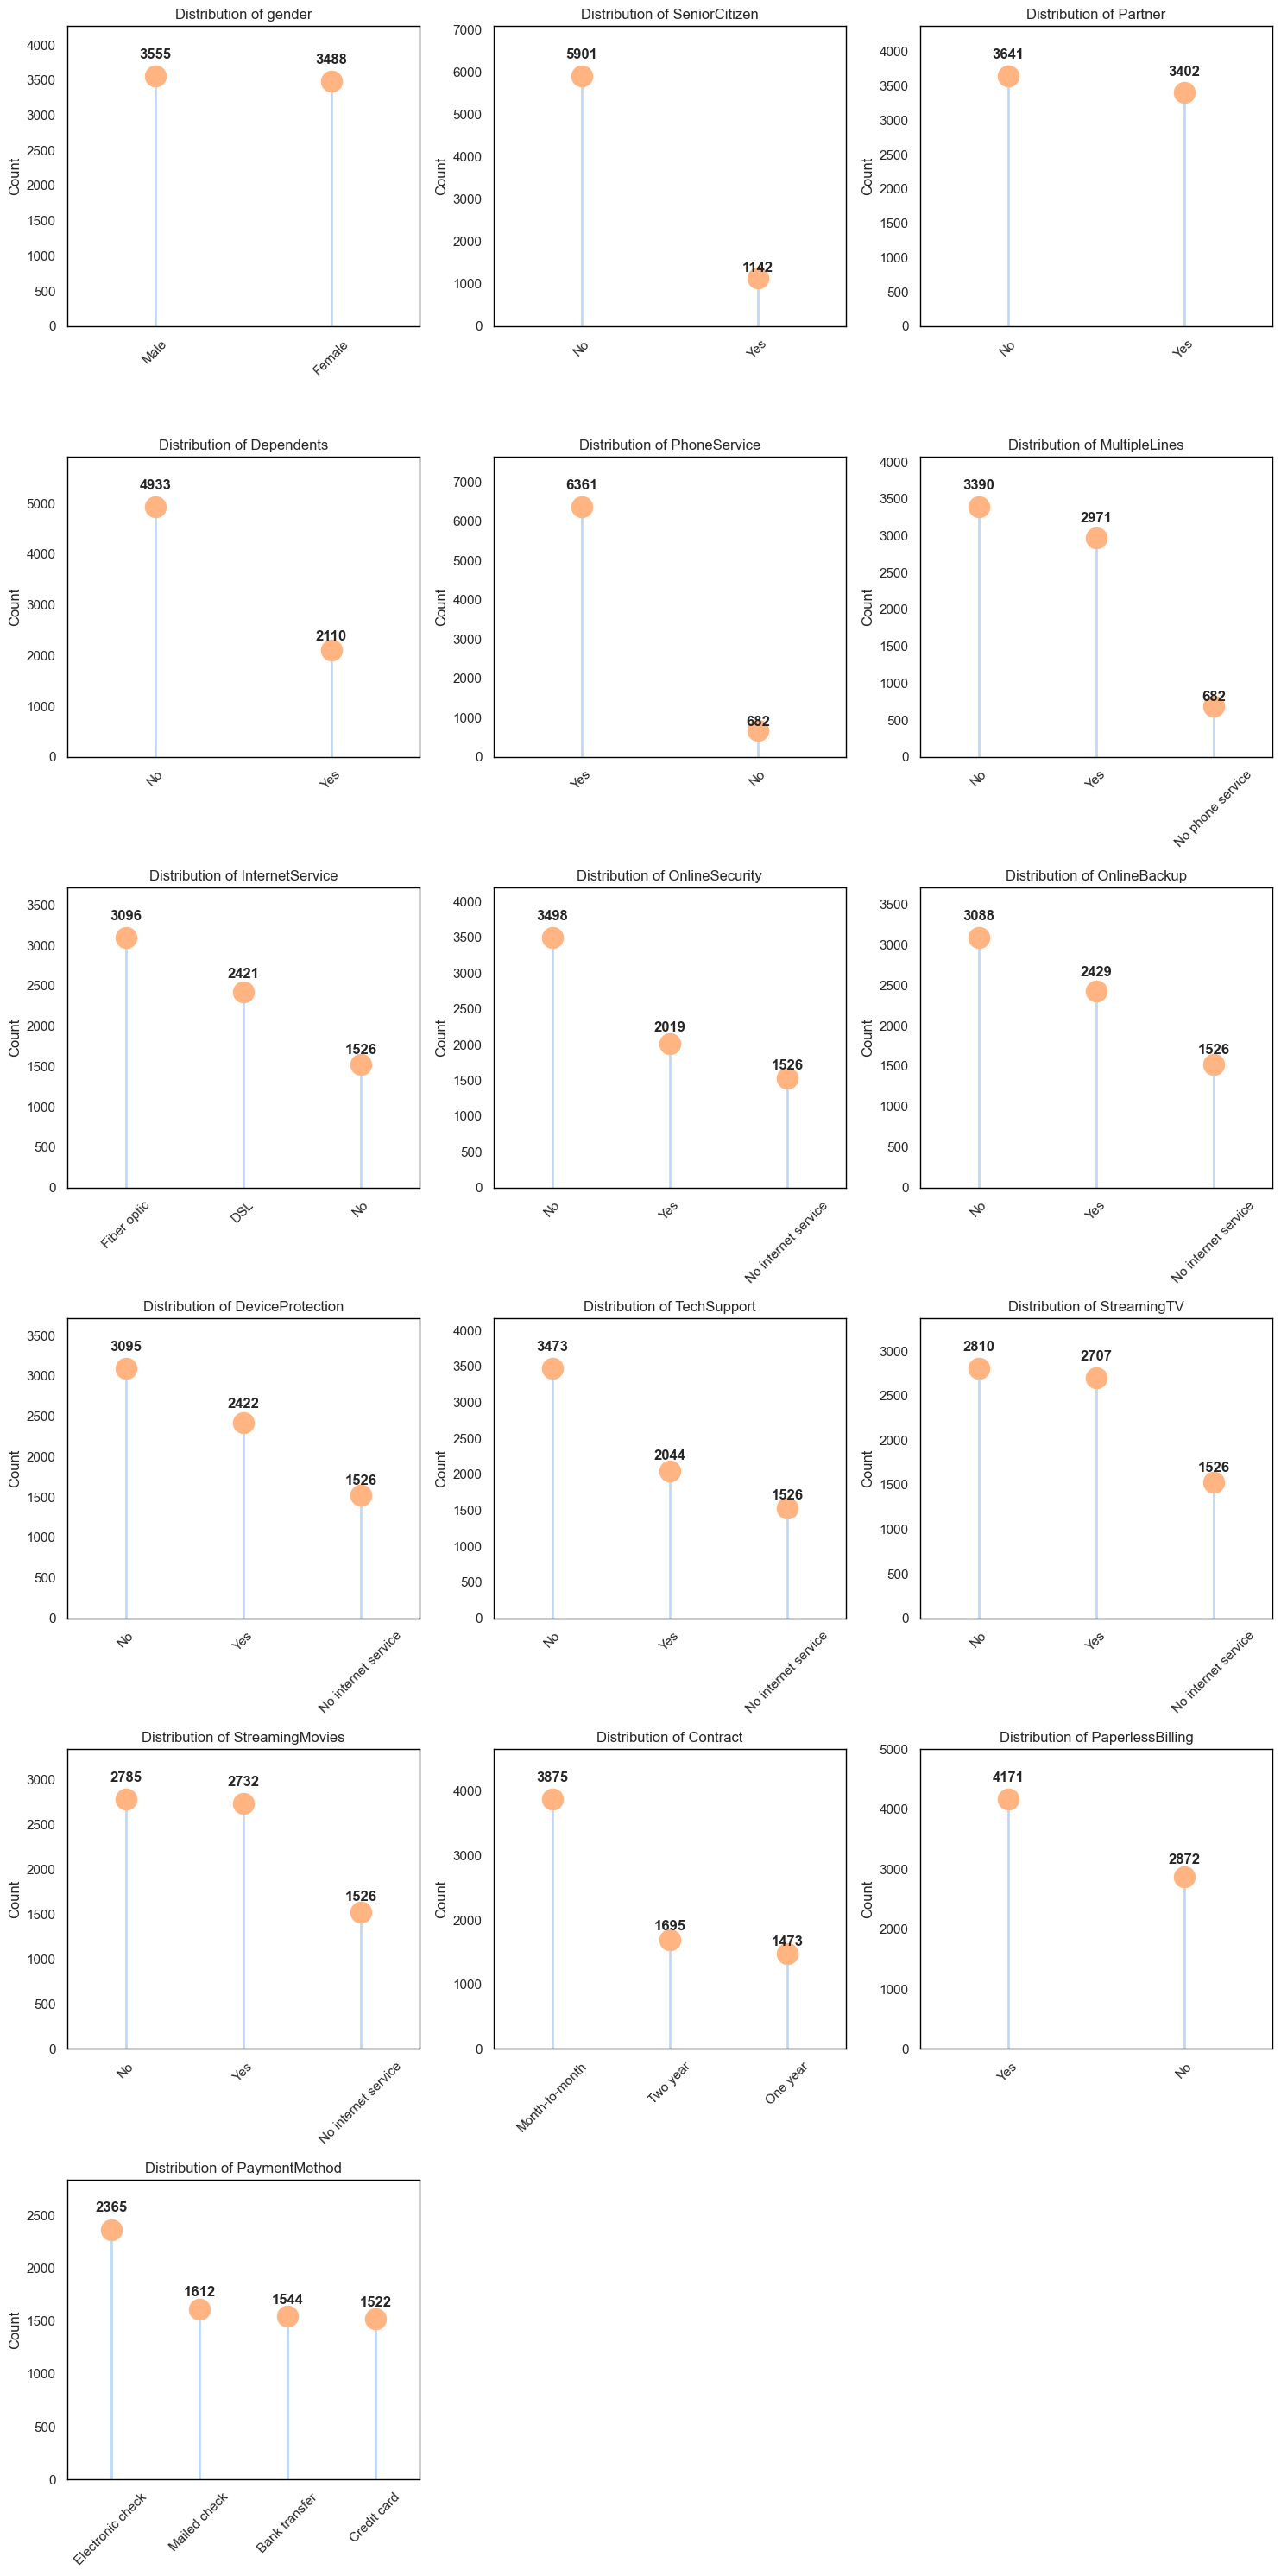

In [13]:
lollipop_chart(df, cat_cols)

<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin: auto;">

<h3 style="color: #000000; background-color: #FFB482; padding: 10px; border-radius: 8px;">
Distribution Insights
</h3>

<hr style="border: 1px solid #FFB482; margin: 25px 0;">

<ul style="font-size: 16px; color: #1C352D; line-height: 1.8; padding: 15px 25px; border-radius: 6px;">
  <li><b>Gender</b> — Distribution is very balanced → gender is likely <b>not</b> a dominant factor in churn.</li>
  <li><b>Senior Citizens</b> — Majority are not senior citizens. The senior group is smaller but still important to analyze for potentially higher churn rates.</li>
  <li><b>Partner</b> — Almost half of the customers have a partner → may be associated with greater contract stability.</li>
  <li><b>Dependents</b> — Most customers do <b>not</b> have dependents → may increase flexibility in switching services.</li>
  <li><b>Phone Service</b> — Most customers subscribe to phone service, with only a small portion without it.</li>
  <li><b>Multiple Lines</b> — Nearly half have only one line, while <b>42%</b> have multiple lines.</li>
  <li><b>Internet Service</b> — Fiber optic is most popular. This group often shows higher churn due to higher pricing.</li>
  <li><b>Add-on Services</b> — Many customers do not take add-ons even if they have internet → <i>upselling opportunity</i>.</li>
  <li><b>Contract Type</b> — Majority are on <b>month-to-month</b> contracts → more vulnerable to churn.</li>
  <li><b>Paperless Billing</b> — Most customers use paperless billing → easier payments, but may be linked to higher churn due to ease of cancellation.</li>
  <li><b>Payment Method</b> — Customers using <b>electronic checks</b> often show higher churn in churn analysis studies.</li>
</ul>

</div>

In [14]:
def barchart_custom(df, features, feature1='Churn', chart_type='stacked'):
    """
    Plots stacked, grouped, or 100% stacked bar charts for categorical features vs a target.
    """
    colors = {'Yes': '#FF893B', 'No': '#2B8FFA'}

    ncols = 3
    nrows = int(np.ceil(len(features) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5*nrows))
    axes = axes.flatten()

    for i, feature2 in enumerate(features):
        ax = axes[i]

        # Prepare data
        data = df.groupby([feature2, feature1]).size().reset_index(name='count')
        pivot_data = data.pivot(index=feature2, columns=feature1, values='count').fillna(0)

        if chart_type == 'stacked':
            bottom_vals = np.zeros(len(pivot_data))
            for churn_status in colors.keys():
                ax.bar(
                    pivot_data.index,
                    pivot_data[churn_status],
                    bottom=bottom_vals,
                    color=colors[churn_status],
                    label=churn_status
                )
                for idx, val in enumerate(pivot_data[churn_status]):
                    if val > 0:
                        ax.text(
                            idx,
                            bottom_vals[idx] + val/2,
                            f"{int(val)}",
                            ha='center', va='center',
                            color='black', fontsize=10
                        )
                bottom_vals += pivot_data[churn_status]

            for idx, total in enumerate(bottom_vals):
                ax.text(
                    idx,
                    total + (max(bottom_vals)*0.02),
                    f"{int(total)}",
                    ha='center', va='bottom', fontsize=10
                )

        elif chart_type == 'grouped':
            width = 0.35
            x = np.arange(len(pivot_data))
            for j, churn_status in enumerate(colors.keys()):
                ax.bar(
                    x + j*width, pivot_data[churn_status],
                    width=width, color=colors[churn_status], label=churn_status
                )
                for xi, val in zip(x + j*width, pivot_data[churn_status]):
                    if val > 0:
                        ax.text(
                            xi, val + (max(pivot_data.sum(axis=1))*0.02),
                            f"{int(val)}", ha='center', va='bottom', fontsize=10
                        )
            ax.set_xticks(x + width/2)
            ax.set_xticklabels(pivot_data.index)

        elif chart_type == 'percent':
            pivot_percent = pivot_data.div(pivot_data.sum(axis=1), axis=0)
            bottom_vals = np.zeros(len(pivot_percent))
            for churn_status in colors.keys():
                ax.bar(
                    pivot_percent.index,
                    pivot_percent[churn_status],
                    bottom=bottom_vals,
                    color=colors[churn_status],
                    label=churn_status
                )
                for idx, val in enumerate(pivot_percent[churn_status]):
                    if val > 0:
                        ax.text(
                            idx,
                            bottom_vals[idx] + val/2,
                            f"{val*100:.1f}%",
                            ha='center', va='center', color='black', fontsize=10
                        )
                bottom_vals += pivot_percent[churn_status]

        ax.set_title(f'{feature2} vs {feature1}')
        ax.set_xlabel(feature2)
        ax.set_ylabel('Number of Customers' if chart_type != 'percent' else 'Percentage')
        ax.set_ylim(0, 1.15 if chart_type == 'percent' else max(pivot_data.sum(axis=1)) * 1.15)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
        ax.legend(title=feature1, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Remove empty axes
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

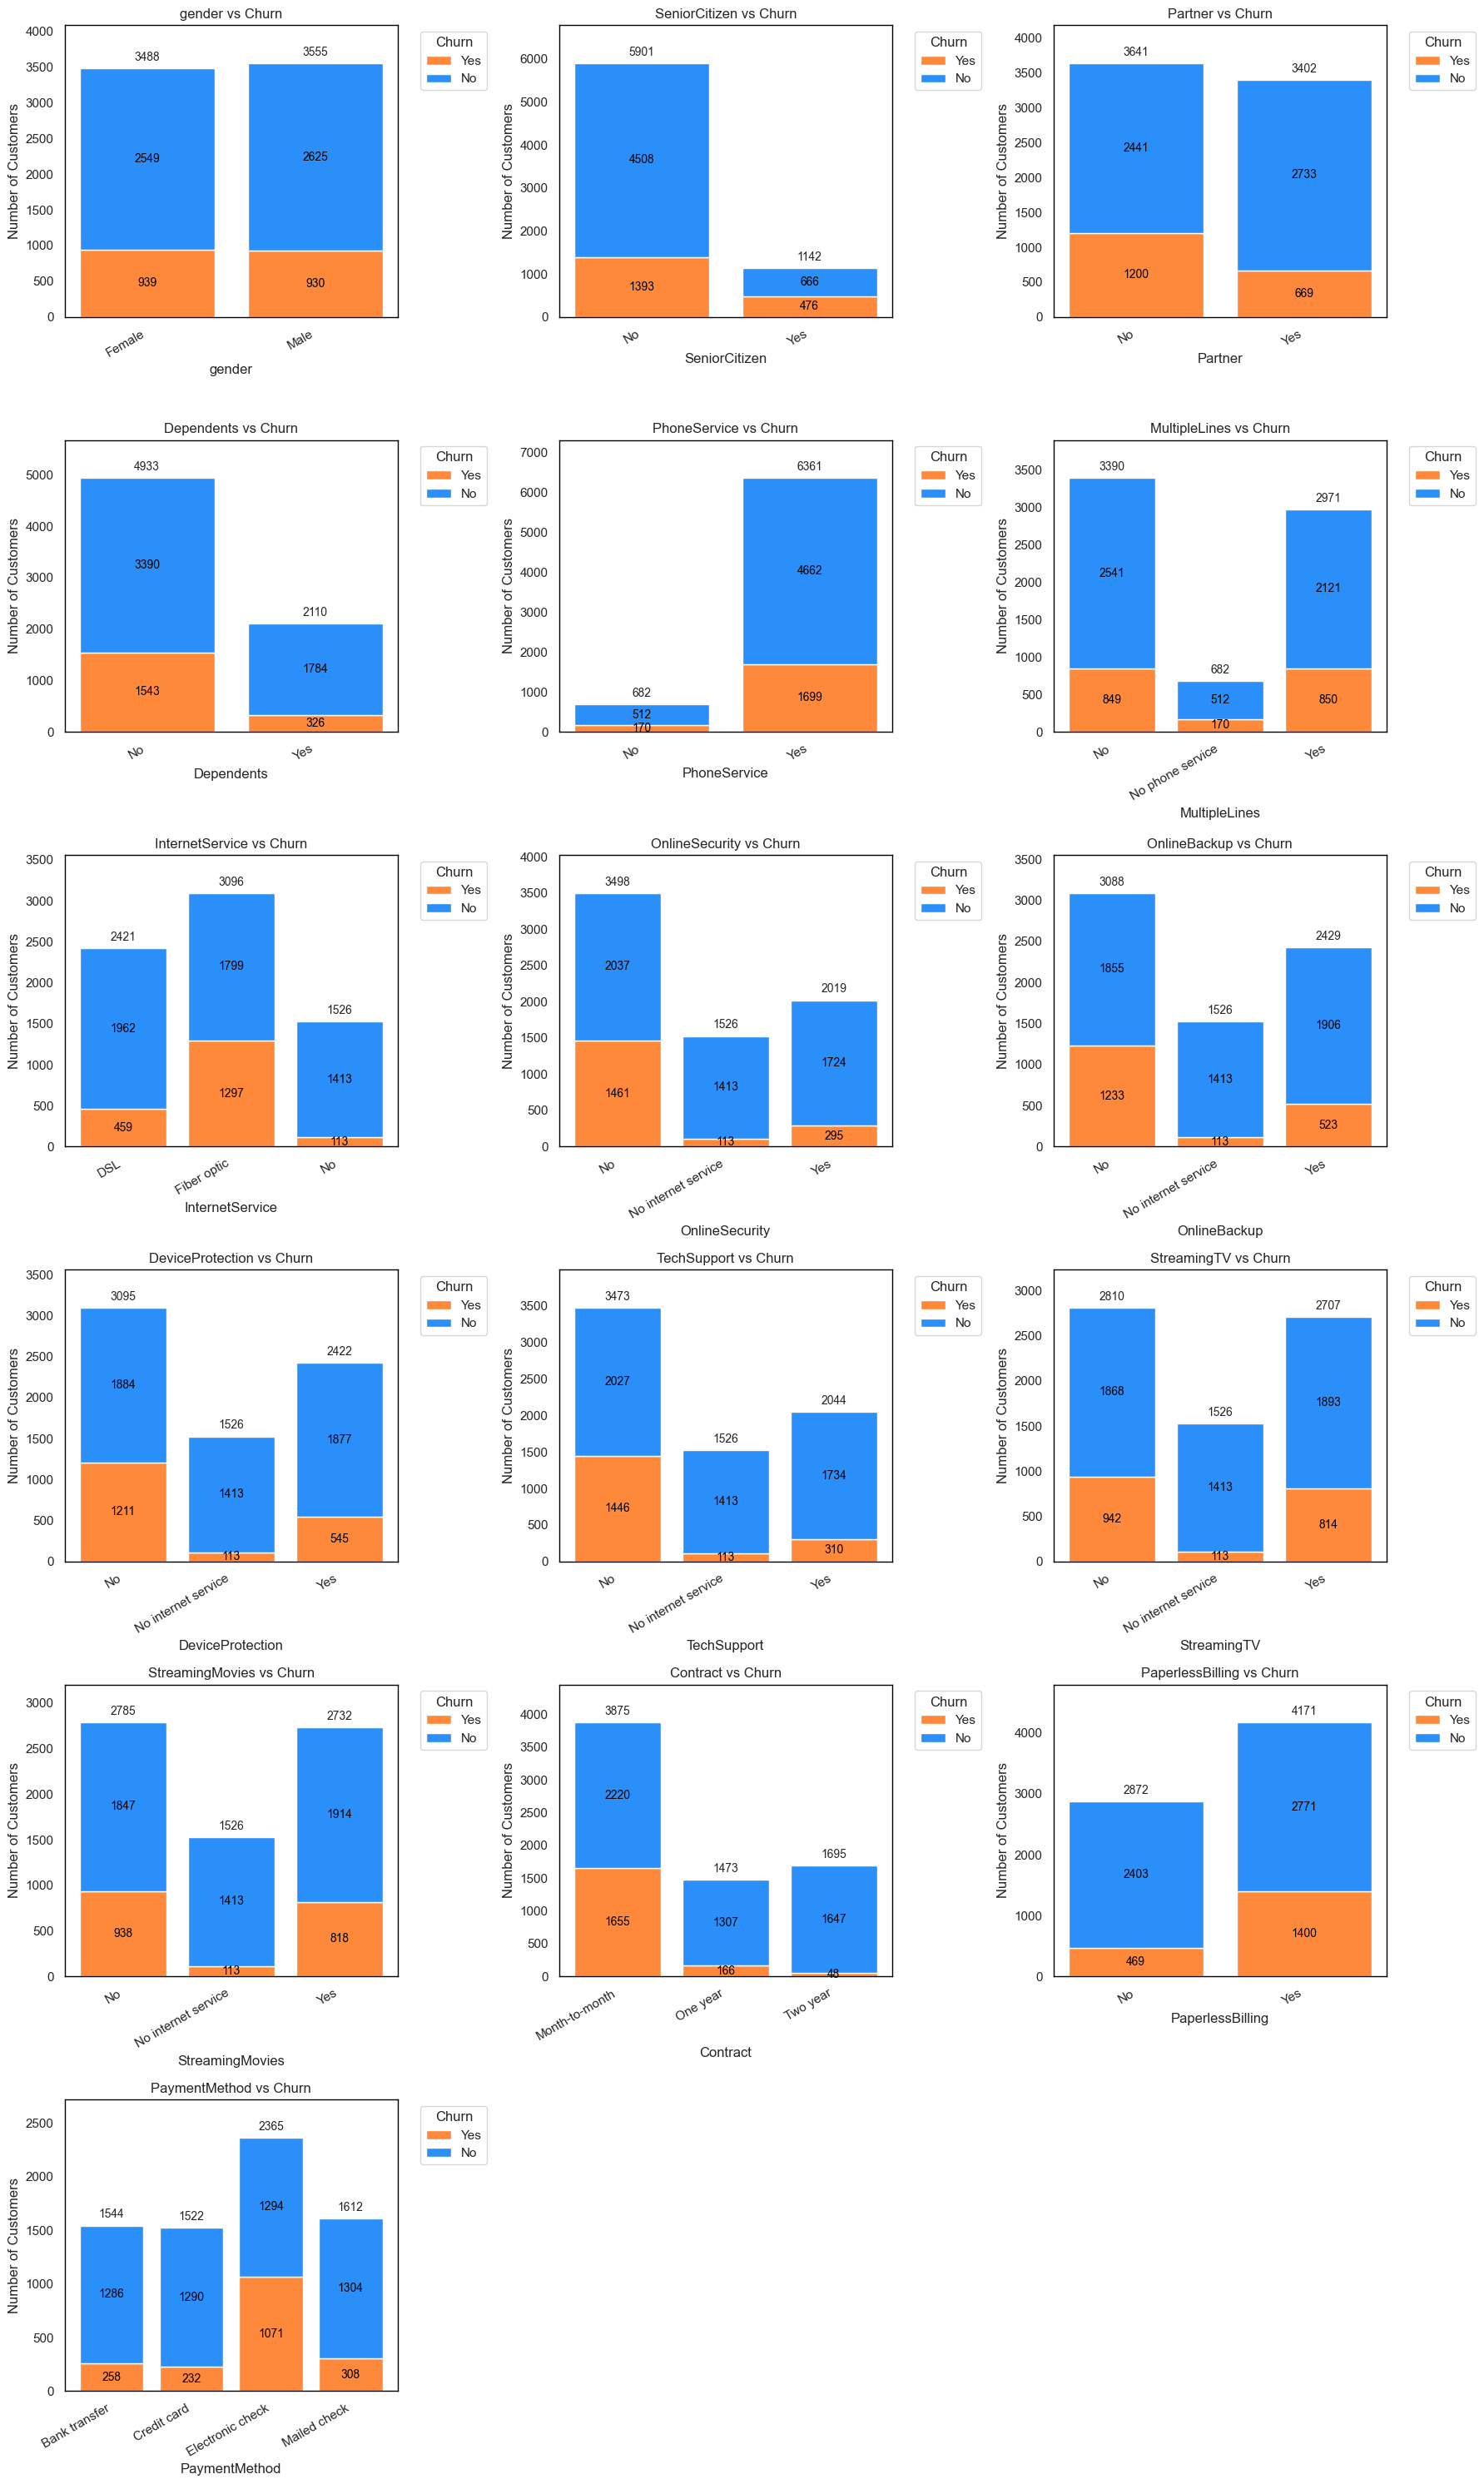

In [15]:
barchart_custom(df, cat_cols, chart_type='stacked')

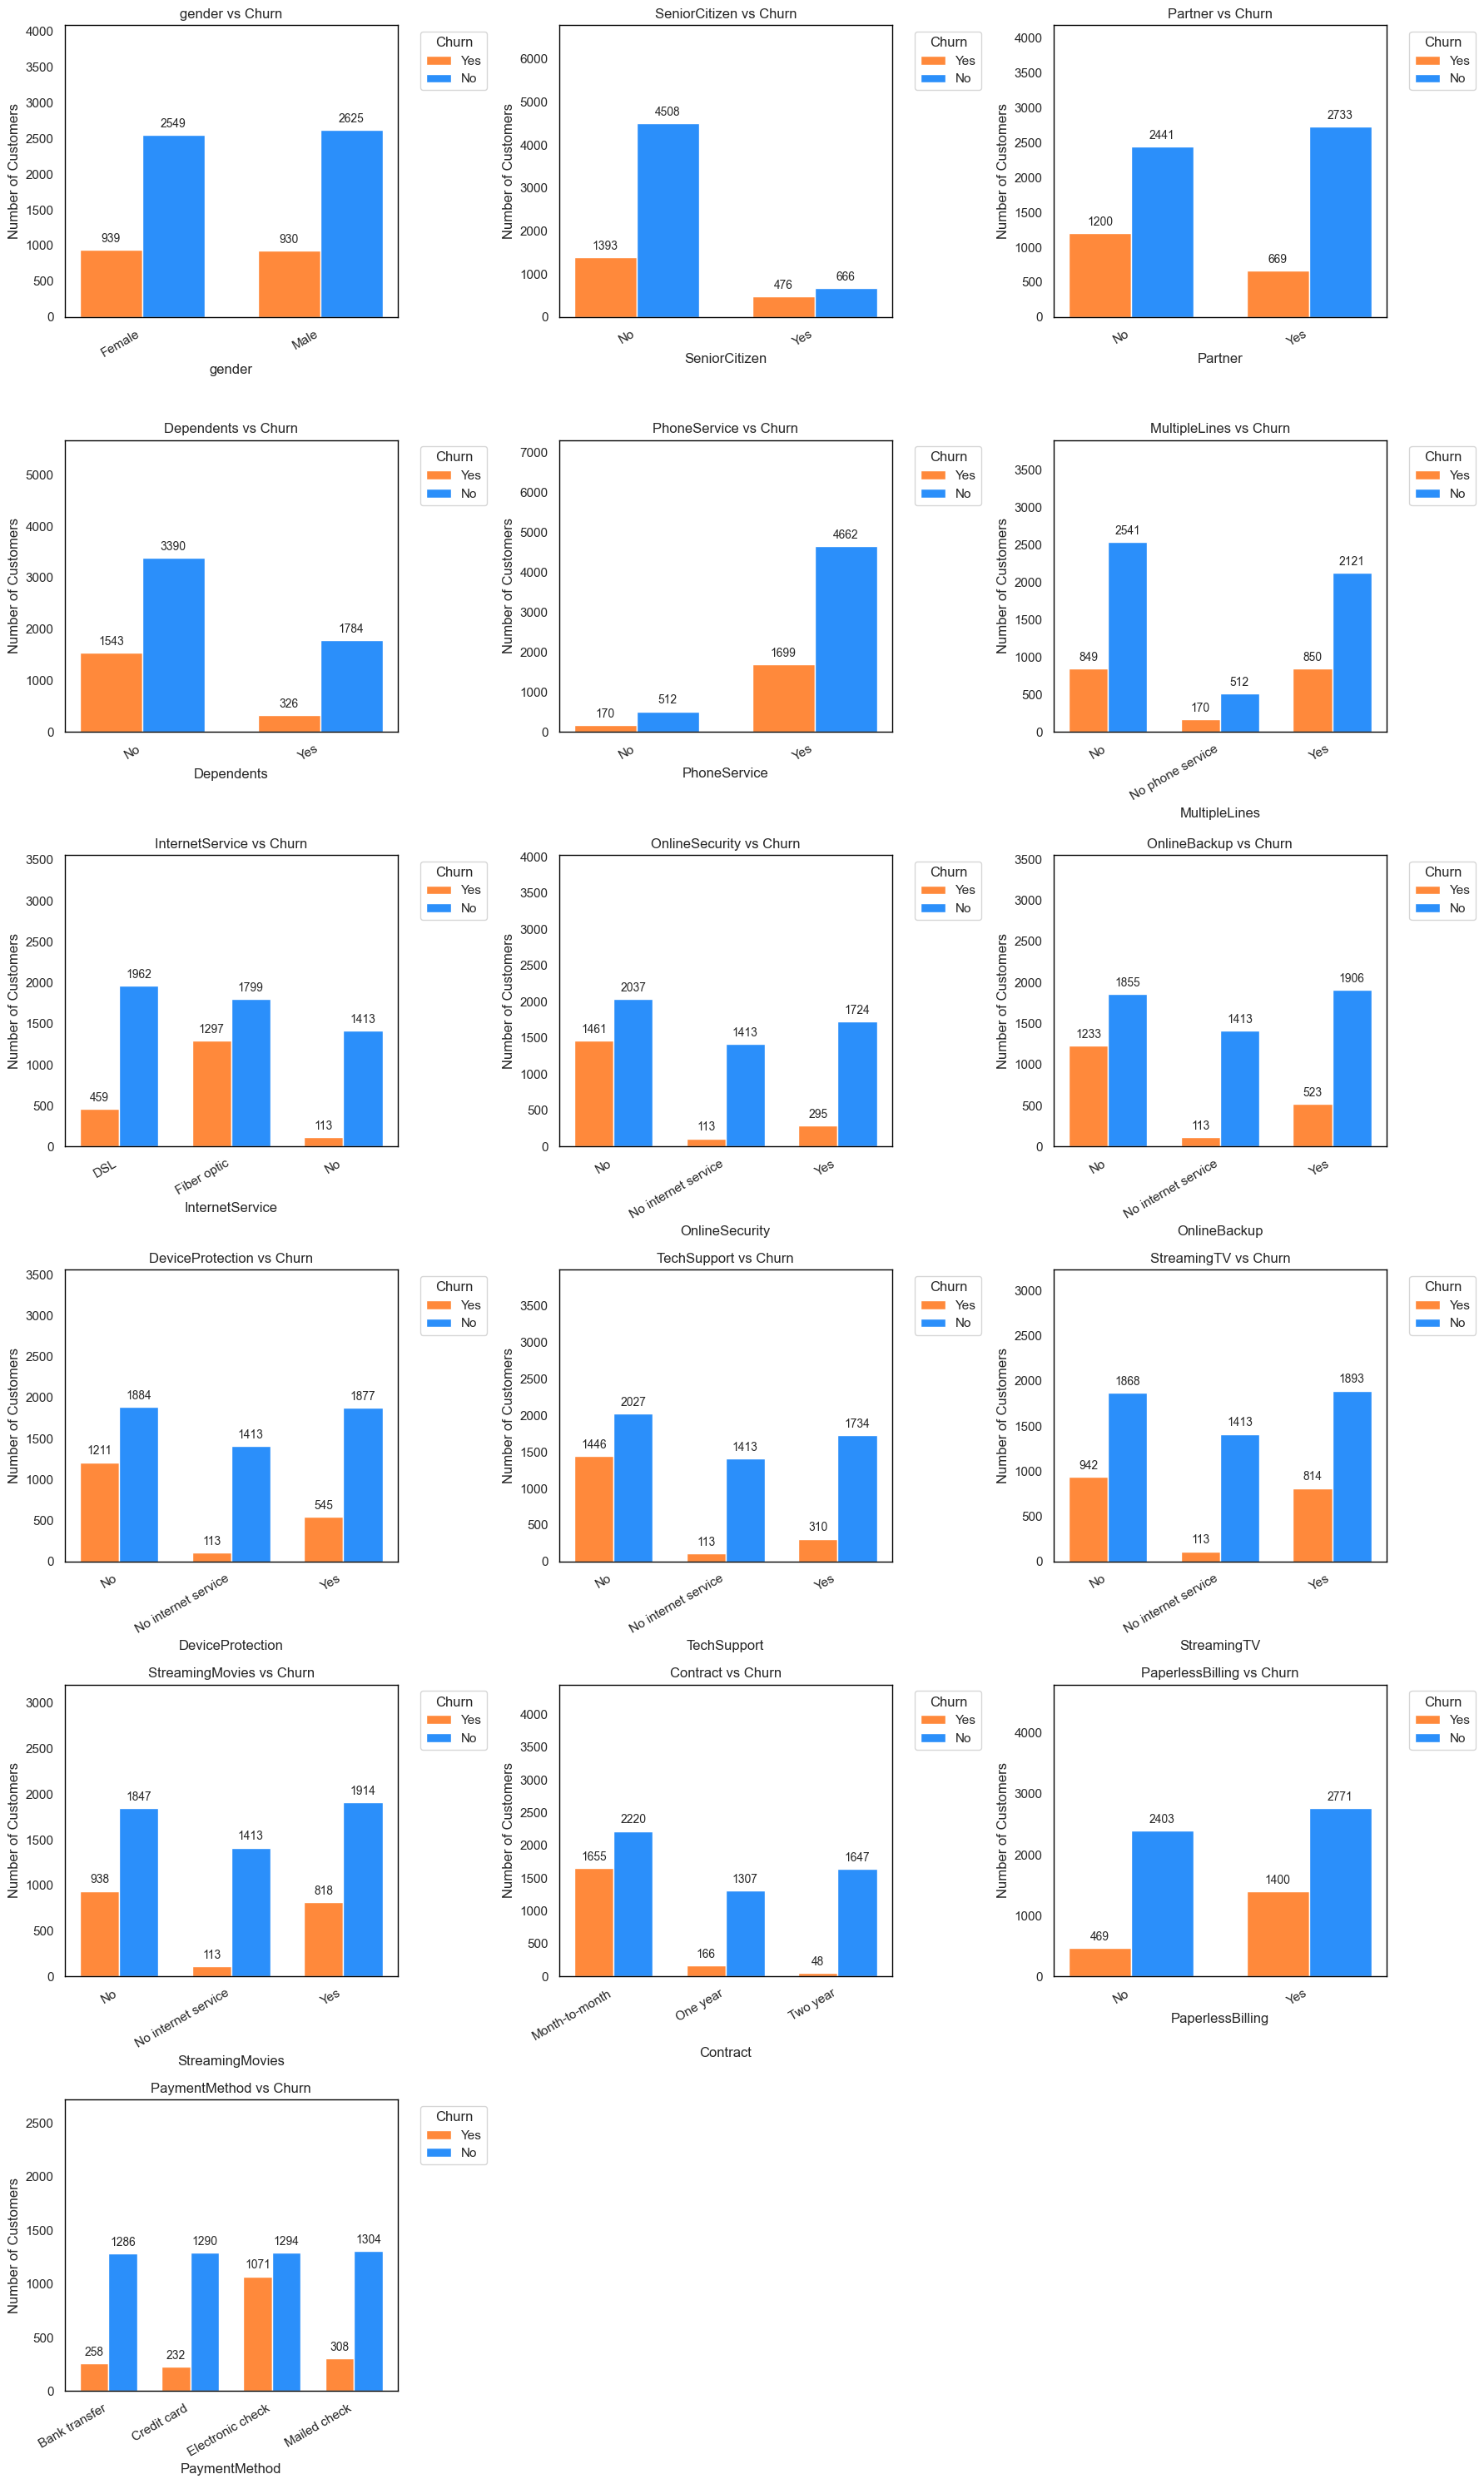

In [16]:
barchart_custom(df, cat_cols, chart_type='grouped')

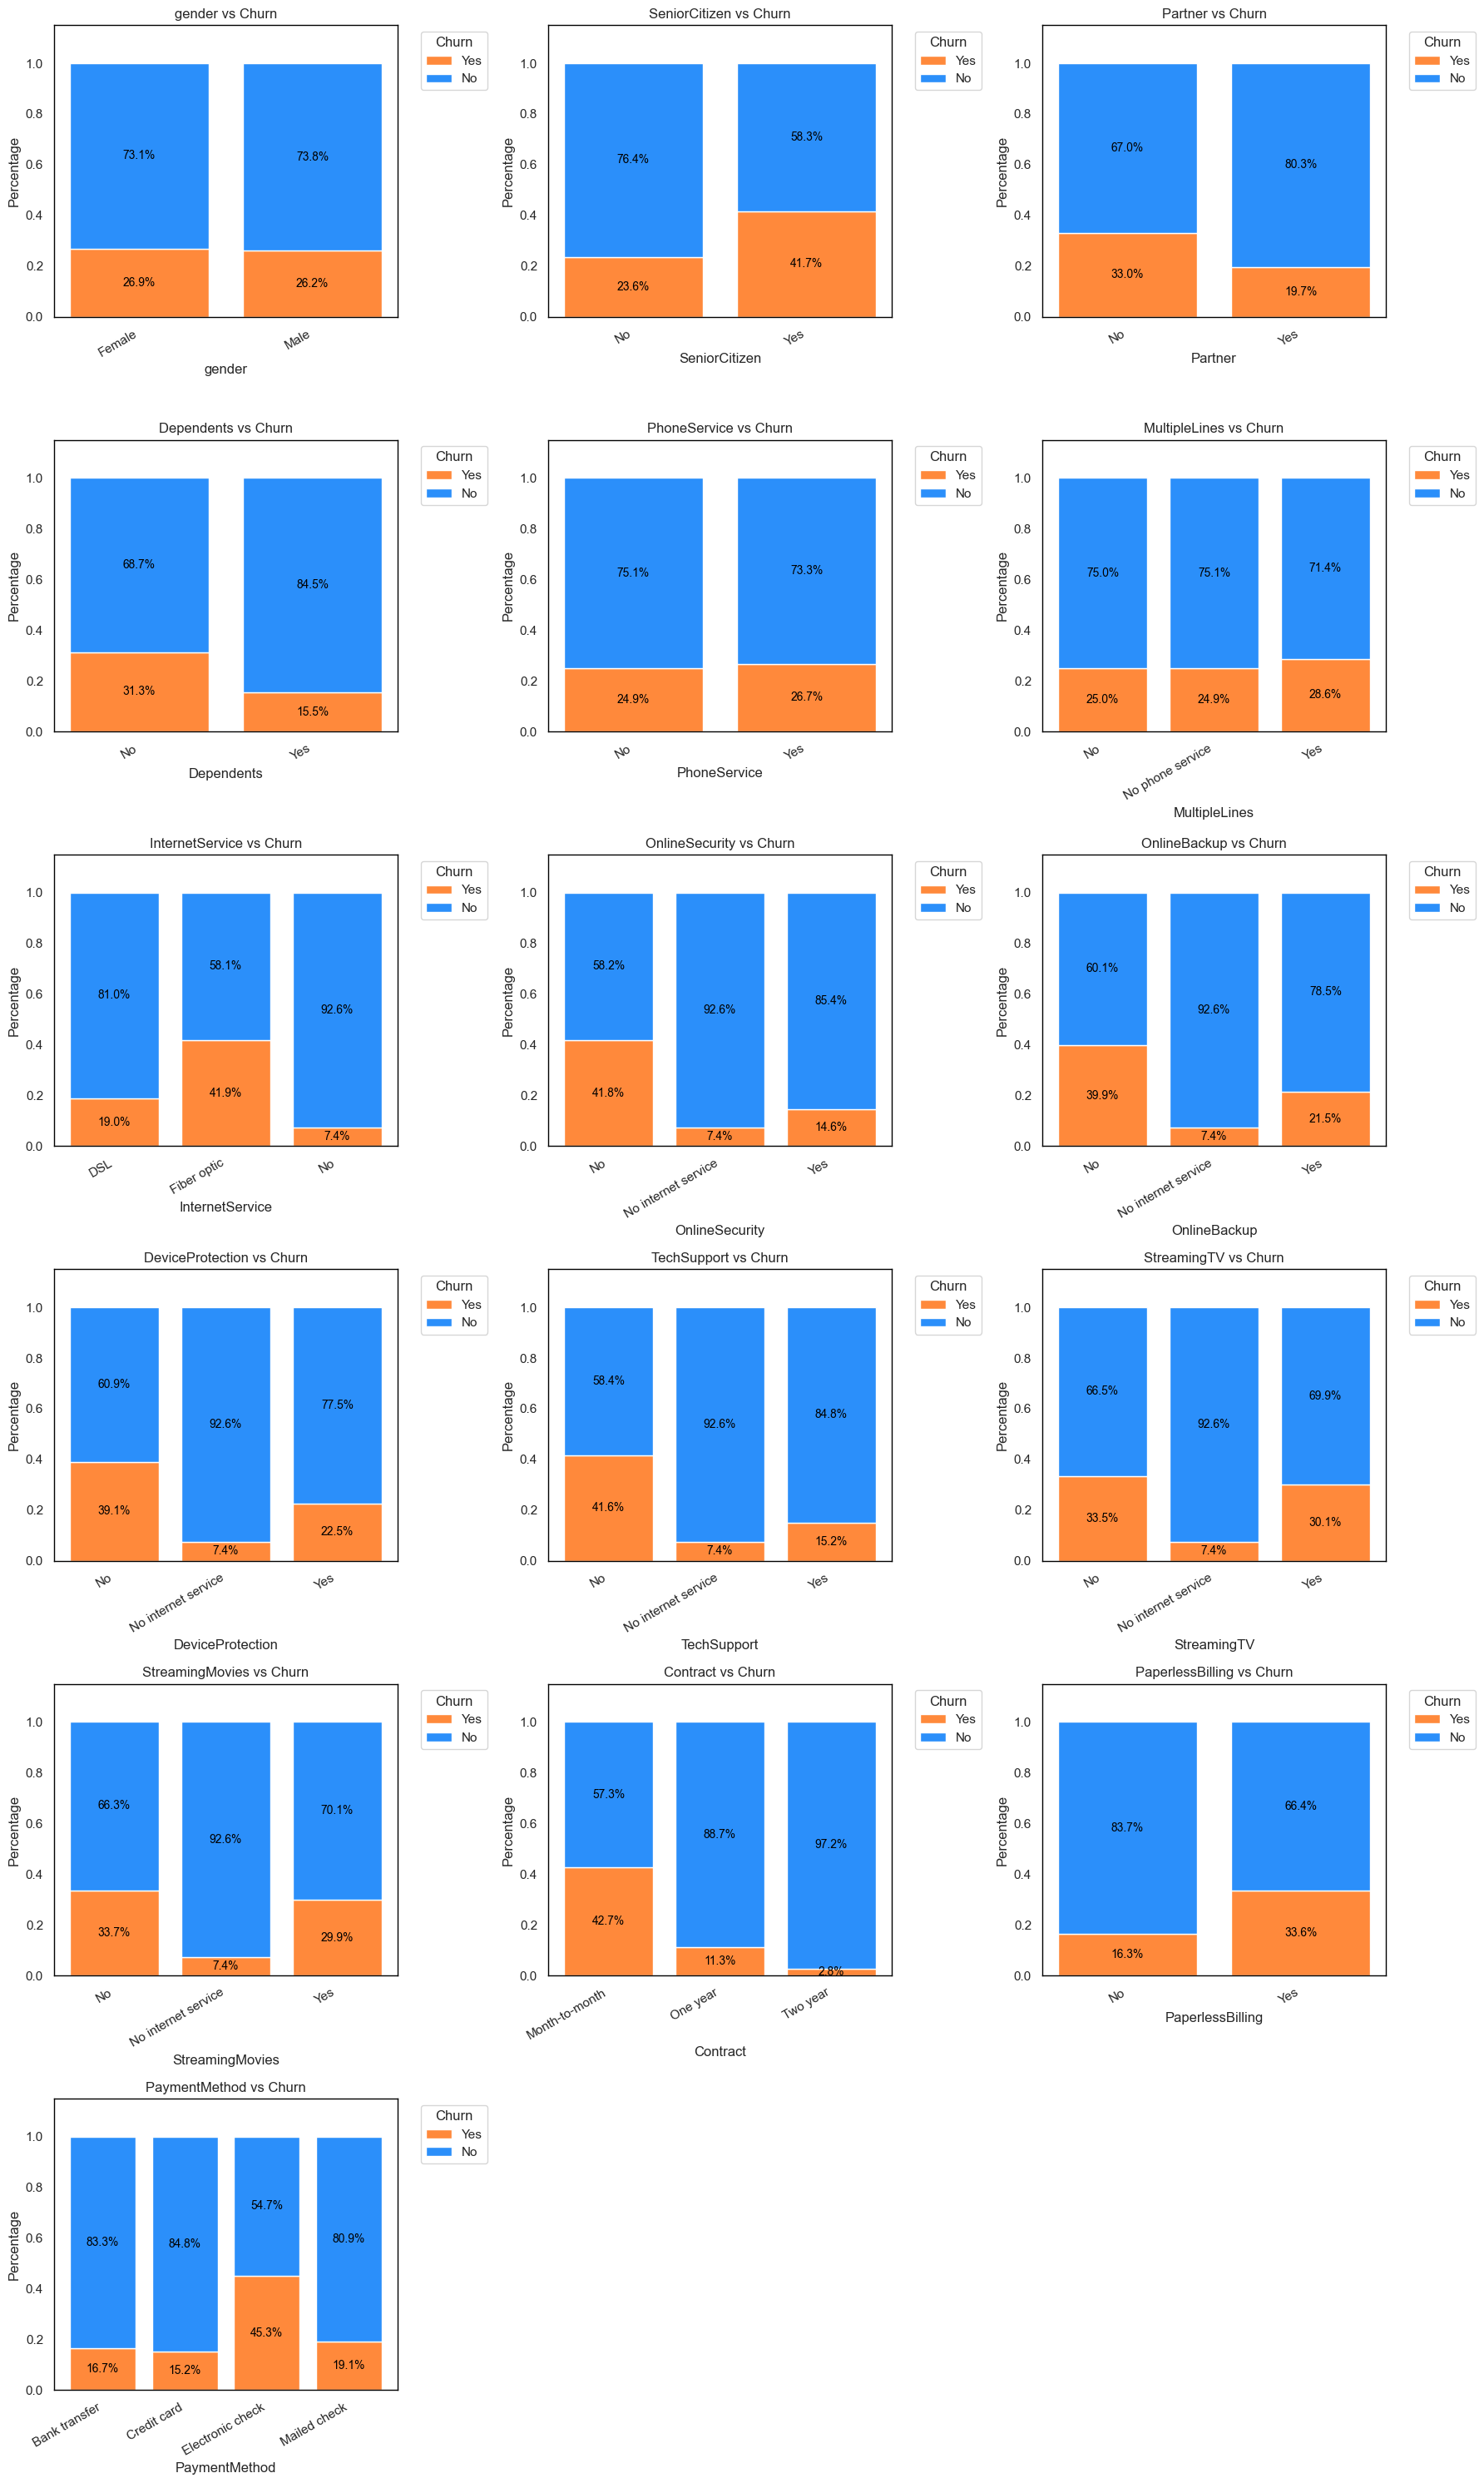

In [17]:
barchart_custom(df, cat_cols, chart_type='percent')

<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin: auto;">

<h3 style="color: #000000; background-color: #FFB482; padding: 10px; border-radius: 8px;">
Churn Insights - 1
</h3>

<hr style="border: 1px solid #FFB482; margin: 25px 0;">

<ul style="font-size: 16px; color: #1C352D; line-height: 1.8; padding: 15px 25px; border-radius: 6px;">
 <li><b>Gender</b> → Male and female customers have almost the same churn rate → gender is <b>not</b> a determining factor for churn.</li>
  <li><b>Senior Citizen</b> → Senior citizens have a higher churn rate compared to non-seniors → possibly due to <i>price sensitivity</i> or special service needs.</li>
  <li><b>Partner & Dependents</b> → Customers without partners and dependents are more likely to churn → this segment is more “mobile” in switching services.</li>
  <li><b>Internet Service</b> → Fiber optic has the highest churn, followed by DSL, while “No internet” has the lowest churn → likely influenced by price and performance expectations.</li>
  <li><b>Add-on Internet</b> → Not having additional services (Online Security, Backup, Tech Support, etc.) is associated with higher churn → presents <i>upselling</i> opportunities.</li>
  <li><b>Contract</b> → Month-to-month contracts have a much higher churn rate than 1-year or 2-year contracts → long-term contracts effectively reduce churn.</li>
  <li><b>Paperless Billing</b> → Customers with paperless billing have higher churn → often linked to flexible month-to-month contracts.</li>
  <li><b>Payment Method</b> → Customers paying by electronic check have the highest churn, whereas bank transfer, credit card, and mailed check show lower churn → electronic check is common among high-risk customers.</li>
</ul>

</div>

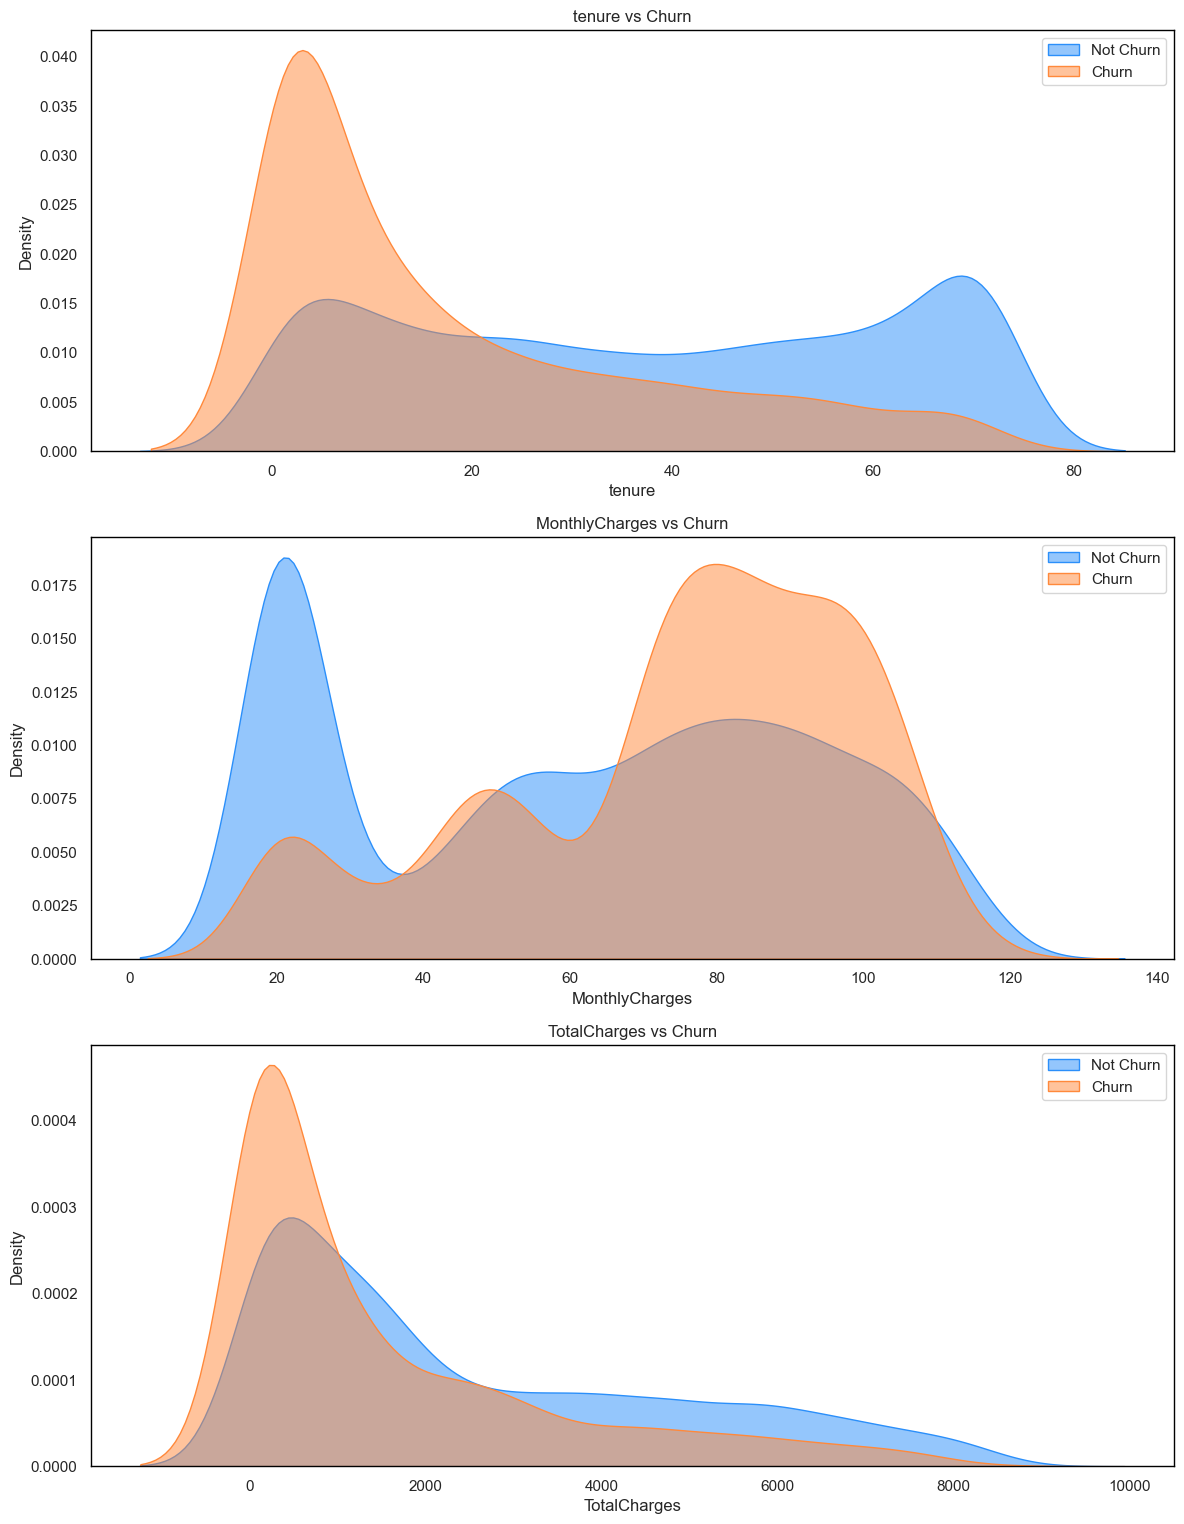

In [18]:
def displot(df, features, feature1='Churn'):
    n_features = len(features)
    ncols = 1
    nrows = (n_features + 1) // 1
    
    plt.figure(figsize=(12, 5*nrows))
    
    # Warna untuk kelas churn
    palette = {
        'Yes': '#FF893B',    # Not Churn
        'No' : '#2B8FFA'    # Churn
    }
    
    for i, feature2 in enumerate(features, 1):
        plt.subplot(nrows, ncols, i)
        
        for cls in df[feature1].unique():
            subset = df[df[feature1] == cls]
            sns.kdeplot(subset[feature2], 
                        shade=True, 
                        alpha=0.5, 
                        color=palette[cls], 
                        label='Churn' if cls == 'Yes' else 'Not Churn')
        
        plt.title(f'{feature2} vs {feature1}')
        plt.xlabel(feature2)
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
displot(df, num_cols)

<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin: auto;">

<h3 style="color: #000000; background-color: #FFB482; padding: 10px; border-radius: 8px;">
Churn Insights - 2
</h3>

<hr style="border: 1px solid #FFB482; margin: 25px 0;">

<ul style="font-size: 16px; color: #1C352D; line-height: 1.8; padding: 15px 25px; border-radius: 6px;">
<li><b>New customers churn more</b> → Most churners have low tenure and low total charges, showing that early-stage retention is critical.</li>
  <li><b>High monthly charges increase churn risk</b> → There’s a clear churn peak in the $70–$100 monthly charge range, suggesting possible price sensitivity.</li>
  <li><b>Loyal customers stay longer</b> → Customers with high tenure and high total charges are far less likely to churn.</li>
  <li><b>Retention focus areas</b> → Target new customers and high-bill customers with special offers, onboarding, and value-added services to reduce churn.</li>
</ul>

</div>

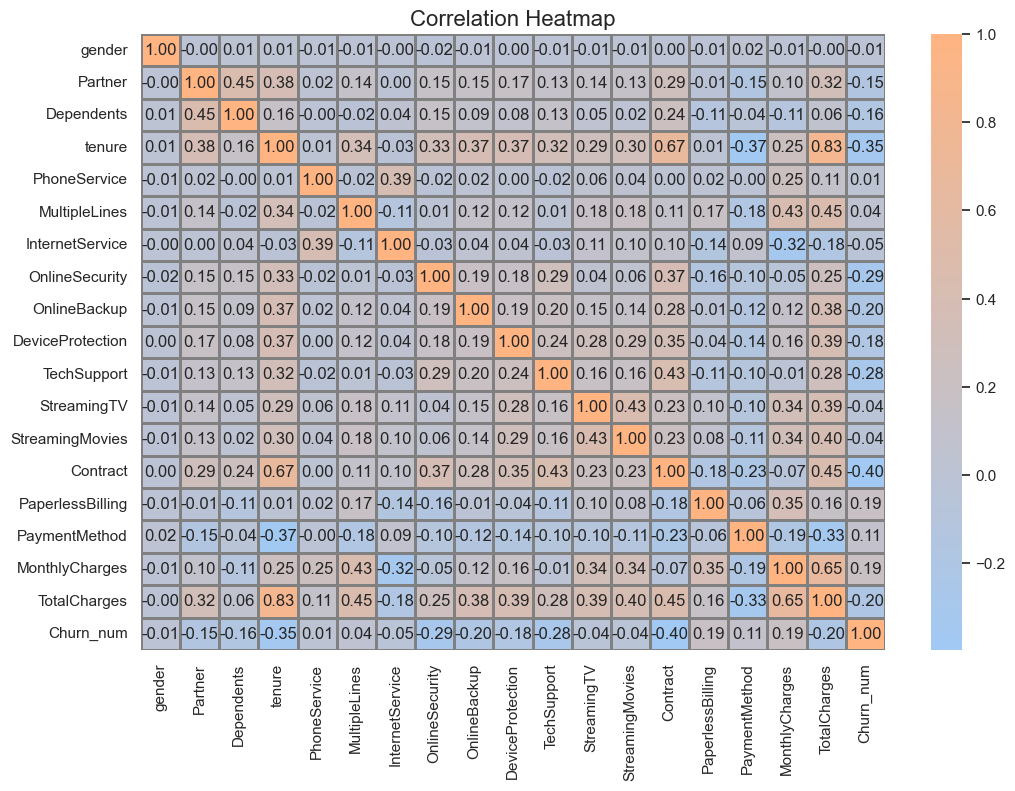

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Data Preprocessing

# Drop customerID since it's just an identifier
df_encoded = df.drop('customerID', axis=1)

# Convert TotalCharges to numeric in case there are spaces
df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')

# Convert Churn separately to numeric
df_encoded['Churn_num'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Identify other categorical columns (exclude 'Churn')
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.drop('Churn', errors='ignore')

# Apply Label Encoding for other categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 2️⃣ Correlation Heatmap

# Select numeric columns only
numeric_df = df_encoded.select_dtypes(include=np.number)

# Create custom blue-orange colormap
colors = ['#A1C9F4', '#FFB482']
cmap = LinearSegmentedColormap.from_list("blue_orange", colors)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    numeric_df.corr(),       # correlation matrix
    annot=True,              # show correlation numbers
    fmt=".2f",               # format numbers
    cmap=cmap,               # custom blue-orange colormap
    linewidths=1,            # add borders between cells
    linecolor='gray'         # border color
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin: auto;">

<h3 style="color: #000000; background-color: #FFB482; padding: 10px; border-radius: 8px;">
Feature Correlation with Churn Insights
</h3>

<hr style="border: 1px solid #FFB482; margin: 25px 0;">

<ol style="font-size: 16px; color: #1C352D; line-height: 1.8; padding: 15px 25px; border-radius: 6px;">
  <li><b>Features most negatively correlated with Churn</b> (higher value → lower churn probability):<br>
    • <b>Tenure</b> (-0.35) → Longer subscription duration → lower churn likelihood.<br>
    • <b>Contract</b> (-0.40) → Longer contracts → lower churn.<br>
    • <b>TotalCharges</b> (-0.20) → Higher total payments (indicating longer subscription) → lower churn.
  </li>
  <li><b>Features positively correlated with Churn</b> (higher value → higher churn probability):<br>
    • <b>MonthlyCharges</b> (+0.19) → Higher monthly charges slightly increase churn risk.<br>
    • <b>PaperlessBilling</b> (+0.19) → Customers with paperless billing tend to churn more easily.
  </li>
  <li><b>Add-on service features</b>:<br>
    • <b>OnlineSecurity</b> (-0.29), <b>TechSupport</b> (-0.28), and <b>OnlineBackup</b> (-0.20) show negative correlation → customers with these add-ons are more loyal.
  </li>
  <li><b>InternetService</b>:<br>
    • Correlation with churn is <b>+0.02</b> → minimal direct effect, but the type of service (fiber optic vs DSL) may indirectly influence churn.
  </li>
  <li><b>Demographic features</b>:<br>
    • <b>SeniorCitizen</b> (+0.15) → Seniors are slightly more likely to churn.<br>
    • <b>Partner</b> (-0.15) &amp; <b>Dependents</b> (-0.16) → Having a partner/dependents slightly reduces churn.<br>
    • <b>Gender</b> (~0.0) → Almost no effect on churn.
  </li>
</ol>

</div>